In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from dqn import DQN

In [2]:
N_PLAYERS = 5
LARGEST_CARD = 30
HAND_SIZE = 5
N_ROUNDS = 5

np.random.seed(0)

In [3]:
state_dict = torch.load('models/model_24500_461.pth')
net = DQN(LARGEST_CARD*2, N_PLAYERS, n_hidden=64)
net.load_state_dict(state_dict)
net

DQN(
  (fc1): Linear(in_features=60, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax()
)

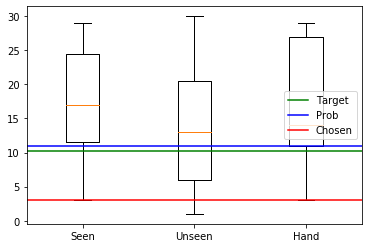

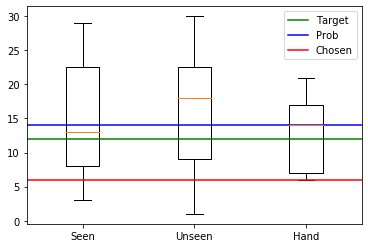

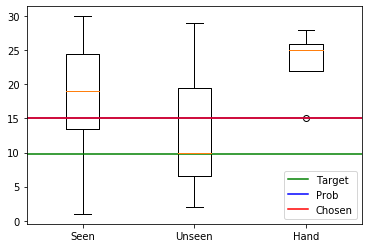

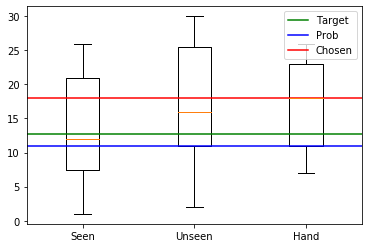

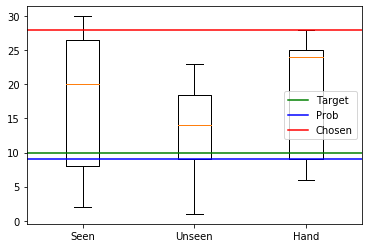

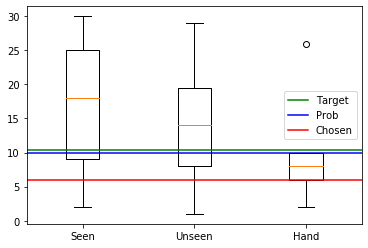

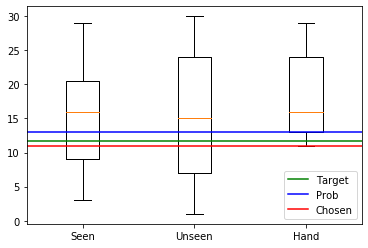

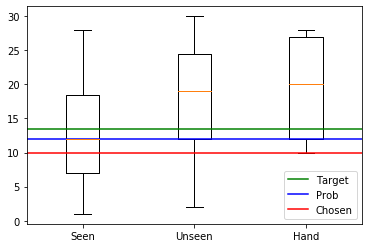

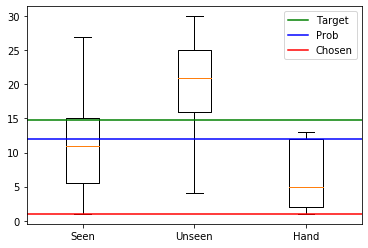

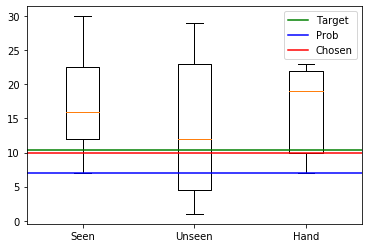

In [4]:
def create_state(hand, history):
    hand_one_hot = np.zeros(LARGEST_CARD, dtype=np.float32)
    hand_one_hot[hand-1] = 1
    
    history = np.asarray(list(history), dtype=np.int)
    history_one_hot = np.zeros(LARGEST_CARD, dtype=np.float32)
    history_one_hot[history-1] = 1
    
    return np.concatenate([hand_one_hot, history_one_hot])

def run_test():
    cards = np.random.choice(range(1, LARGEST_CARD+1), size=15, replace=False)
    hand, history = cards[:5], cards[5:]
    hand.sort()
    
    state = create_state(hand, history)
    state = torch.tensor([state], dtype=torch.float)
    action = net(state).argmax().item()
    chosen_card = hand[action]
    
    seen_cards = set(cards)
    unseen_cards = set(range(1, LARGEST_CARD+1)) - seen_cards
    
    ratio = (N_PLAYERS - 2) / (2*N_PLAYERS - 2)
    target = sum(unseen_cards) / len(unseen_cards) * 2 * ratio
    
    def score_prob(card, unseen_cards):
        num_lower = sum(c < card for c in unseen_cards)
        p = num_lower / len(unseen_cards)
        return p**(N_PLAYERS-2) * (1 - p) - p**(N_PLAYERS-1)
    probs = [score_prob(card, unseen_cards) for card in hand]
    prob_choice = hand[np.argmax(probs)]
    
    plt.figure()
    plt.boxplot([list(seen_cards), list(unseen_cards), hand], positions=[0, 1, 2])
    plt.xticks([0, 1, 2], ['Seen', 'Unseen', 'Hand'])
    plt.axhline(target, color='g', label='Target')
    plt.axhline(prob_choice, color='b', label='Prob')
    plt.axhline(chosen_card, color='r', label='Chosen')
    plt.legend()
    plt.show()

for i in range(10):
    run_test()

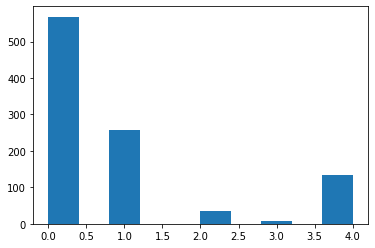

In [5]:
np.random.seed(0)

def get_action():
    cards = np.random.choice(range(1, LARGEST_CARD+1), size=15, replace=False)
    hand, history = cards[:5], cards[5:]
    hand.sort()
    
    state = create_state(hand, history)
    state = torch.tensor([state], dtype=torch.float)
    action = net(state).argmax().item()
    return action

l = [get_action() for _ in range(1_000)]
plt.hist(l);

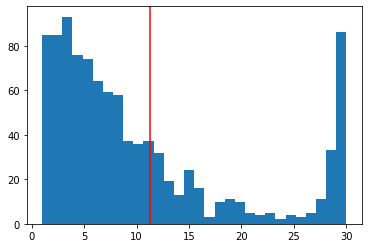

In [6]:
np.random.seed(0)

def get_card():
    cards = np.random.choice(range(1, LARGEST_CARD+1), size=15, replace=False)
    hand, history = cards[:5], cards[5:]
    hand.sort()
    
    state = create_state(hand, history)
    state = torch.tensor([state], dtype=torch.float)
    action = net(state).argmax().item()
    return hand[action]

l = [get_card() for _ in range(1_000)]
plt.hist(l, bins=30)
plt.axvline(30 * 3/8, color='r');